In [1]:
import tensorflow as tf
from glob import glob
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
import skimage.color as color

In [2]:
# read images and transform to the desired size
def read_img(file, size = (128,128)):
    img = tf.keras.preprocessing.image.load_img(file, target_size=size)
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = np.array(img, dtype=float)
    return img

In [3]:
image = 'tmp.jpg'

input_image = read_img(image)
input_image = input_image.astype('uint8')
input_image = color.rgb2lab(input_image*1.0/255)
input_image = np.array(input_image)

X_test = deepcopy(input_image[:,:,0])
X_test = X_test.reshape(1, 128, 128, 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Color data out of range: Z < 0 in 5 pixels
  


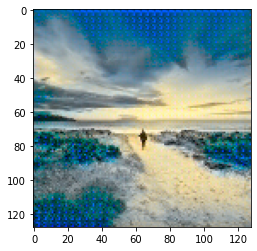

In [33]:
generator = tf.keras.models.load_model('generator_100_v5.h5', compile=False)
pred = generator.predict(X_test)
pred *= 128

cur = np.zeros((128,128,3))
cur[:,:,0] = X_test[0][:,:,0]
cur[:,:,1:] = pred[0]
xyz = color.lab2xyz(cur)
rgb = color.xyz2rgb(xyz)

plt.imshow(rgb)

In [34]:
rgb.shape

(128, 128, 3)

In [35]:
rgb *= 255

In [36]:
from PIL import Image


PIL_image = Image.fromarray(np.uint8(rgb))

In [39]:
type(PIL_image)


PIL.Image.Image